<a href="https://colab.research.google.com/github/BragaGiu/projeto-telecom-X-parte-2/blob/main/TelecomX_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar bibliotecas

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import requests
import gdown
from IPython.display import display, HTML

# Carregamento base de dados

In [4]:
df = pd.read_csv('/content/dados_tratados.csv')

In [5]:
df.head()

Churn genero_cliente  maior_65_anos  possui_parceiro  dependentes  \
0      0         Female              0                1            1   
1      0           Male              0                0            0   
2      1           Male              0                0            0   
3      1           Male              1                1            0   
4      1         Female              1                1            0   

   tempo_contrato_meses  servico_telefonico mais_de_uma_linha_telefonica  \
0                     9                   1                           No   
1                     9                   1                          Yes   
2                     4                   1                           No   
3                    13                   1                           No   
4                     3                   1                           No   

  servico_internet servico_seguranca_online  ...   tipo_contrato  \
0              DSL                       No  ...        One year   
1              DSL                       No  ...  Month-to-month   
2      Fiber optic                       No  ...  Month-to-month   
3      Fiber optic                       No  ...  Month-to-month   
4      Fiber optic                       No  ...  Month-to-month   

  fatura_online forma_de_pagamento cobranca_mensal cobranca_total  \
0             1       Mailed check            65.6         593.30   
1             0       Mailed check            59.9         542.40   
2             1   Electronic check            73.9         280.85   
3             1   Electronic check            98.0        1237.85   
4             1       Mailed check            83.9         267.40   

  conta_diaria     Idoso tempo_contrato_faixa  Churn_num  num_servicos  
0     2.186667  Menor 65                 0-12          0             3  
1     1.996667  Menor 65                 0-12          0             2  
2     2.463333  Menor 65                 0-12          1             1  
3     3.266667  Maior 65                13-24          1             4  
4     2.796667  Maior 65                 0-12          1             2  

[5 rows x 25 columns]

# Remover colunas irrelevantes

In [6]:
# Remova colunas que n√£o s√£o √∫teis para a modelagem
columns_to_drop = ['conta_diaria', 'Idoso', 'tempo_contrato_faixa', 'Churn_num']
df = df.drop(columns=columns_to_drop)

display(df.head())

Churn genero_cliente  maior_65_anos  possui_parceiro  dependentes  \
0      0         Female              0                1            1   
1      0           Male              0                0            0   
2      1           Male              0                0            0   
3      1           Male              1                1            0   
4      1         Female              1                1            0   

   tempo_contrato_meses  servico_telefonico mais_de_uma_linha_telefonica  \
0                     9                   1                           No   
1                     9                   1                          Yes   
2                     4                   1                           No   
3                    13                   1                           No   
4                     3                   1                           No   

  servico_internet servico_seguranca_online  ... servico_protecao_dispositivo  \
0              DSL                       No  ...                           No   
1              DSL                       No  ...                           No   
2      Fiber optic                       No  ...                          Yes   
3      Fiber optic                       No  ...                          Yes   
4      Fiber optic                       No  ...                           No   

  servico_suporte_tecnico servico_streaming_TV servico_streaming_filmes  \
0                     Yes                  Yes                       No   
1                      No                   No                      Yes   
2                      No                   No                       No   
3                      No                  Yes                      Yes   
4                     Yes                  Yes                       No   

    tipo_contrato fatura_online  forma_de_pagamento cobranca_mensal  \
0        One year             1        Mailed check            65.6   
1  Month-to-month             0        Mailed check            59.9   
2  Month-to-month             1    Electronic check            73.9   
3  Month-to-month             1    Electronic check            98.0   
4  Month-to-month             1        Mailed check            83.9   

   cobranca_total  num_servicos  
0          593.30             3  
1          542.40             2  
2          280.85             1  
3         1237.85             4  
4          267.40             2  

[5 rows x 21 columns]

As colunas removidas (conta_diaria, Idoso, tempo_contrato_faixa, Churn_num) foram escolhidas por alguns motivos:

* conta_diaria: Esta coluna parece ser uma agrega√ß√£o ou c√°lculo baseado em outras colunas j√° presentes no dataset (cobranca_mensal, tempo_contrato_meses). Incluir tanto a coluna original quanto a derivada pode introduzir multicolinearidade e n√£o adicionar novas informa√ß√µes relevantes para o modelo preditivo. Al√©m disso, colunas calculadas podem mascarar a import√¢ncia das vari√°veis originais que as comp√µem.
* Idoso: Esta coluna √© uma categoriza√ß√£o da coluna maior_65_anos. Utilizar a coluna original maior_65_anos (que √© bin√°ria) √© geralmente mais direto e evita a cria√ß√£o de uma nova vari√°vel categ√≥rica que representa a mesma informa√ß√£o.
tempo_contrato_faixa: Similar √† coluna Idoso, esta coluna √© uma categoriza√ß√£o da coluna tempo_contrato_meses. A coluna original tempo_contrato_meses fornece uma granularidade maior e pode capturar nuances no tempo de contrato que a faixa et√°ria n√£o capturaria. Manter a informa√ß√£o cont√≠nua (tempo_contrato_meses) √© geralmente prefer√≠vel para modelos que podem lidar com vari√°veis num√©ricas.
* Churn_num: Esta coluna √© a vers√£o num√©rica da coluna Churn, que √© a vari√°vel alvo que queremos prever. Manter ambas as colunas (Churn e Churn_num) no conjunto de features para treinar o modelo seria redundante e incorreto, pois estar√≠amos usando a pr√≥pria vari√°vel alvo como preditora. Mantemos a coluna Churn como a vari√°vel alvo para a modelagem.


Em resumo, removemos essas colunas para evitar redund√¢ncia de informa√ß√µes, multicolinearidade e o uso indevido da vari√°vel alvo como preditora, focando nas vari√°veis que trazem informa√ß√µes independentes e relevantes para prever o churn.

# Tratamento de vari√°veis categ√≥ricas (One-Hot Encoding)

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identificar colunas categ√≥ricas
categorical_cols = df.select_dtypes(include='object').columns

# Criar ColumnTransformer
column_trans = ColumnTransformer(
    transformers=[('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# Aplicar transforma√ß√£o
df_encoded = column_trans.fit_transform(df)

# Recuperar nomes das colunas j√° tratados
new_column_names = column_trans.get_feature_names_out()

# Converter para DataFrame
df_encoded = pd.DataFrame(df_encoded, columns=new_column_names, index=df.index)

display(df_encoded.head())


ohe__genero_cliente_Female  ohe__genero_cliente_Male  \
0                         1.0                       0.0   
1                         0.0                       1.0   
2                         0.0                       1.0   
3                         0.0                       1.0   
4                         1.0                       0.0   

   ohe__mais_de_uma_linha_telefonica_No  \
0                                   1.0   
1                                   0.0   
2                                   1.0   
3                                   1.0   
4                                   1.0   

   ohe__mais_de_uma_linha_telefonica_No phone service  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   ohe__mais_de_uma_linha_telefonica_Yes  ohe__servico_internet_DSL  \
0                                    0.0                        1.0   
1                                    1.0                        1.0   
2                                    0.0                        0.0   
3                                    0.0                        0.0   
4                                    0.0                        0.0   

   ohe__servico_internet_Fiber optic  ohe__servico_internet_No  \
0                                0.0                       0.0   
1                                0.0                       0.0   
2                                1.0                       0.0   
3                                1.0                       0.0   
4                                1.0                       0.0   

   ohe__servico_seguranca_online_No  \
0                               1.0   
1                               1.0   
2                               1.0   
3                               1.0   
4                               1.0   

   ohe__servico_seguranca_online_No internet service  ...  remainder__Churn  \
0                                                0.0  ...               0.0   
1                                                0.0  ...               0.0   
2                                                0.0  ...               1.0   
3                                                0.0  ...               1.0   
4                                                0.0  ...               1.0   

   remainder__maior_65_anos  remainder__possui_parceiro  \
0                       0.0                         1.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       1.0                         1.0   
4                       1.0                         1.0   

   remainder__dependentes  remainder__tempo_contrato_meses  \
0                     1.0                              9.0   
1                     0.0                              9.0   
2                     0.0                              4.0   
3                     0.0                             13.0   
4                     0.0                              3.0   

   remainder__servico_telefonico  remainder__fatura_online  \
0                            1.0                       1.0   
1                            1.0                       0.0   
2                            1.0                       1.0   
3                            1.0                       1.0   
4                            1.0                       1.0   

   remainder__cobranca_mensal  remainder__cobranca_total  \
0                        65.6                     593.30   
1                        59.9                     542.40   
2                        73.9                     280.85   
3                        98.0                    1237.85   
4                        83.9                     267.40   

   remainder__num_servicos  
0                    

No processo de prepara√ß√£o dos dados, foi necess√°rio transformar as vari√°veis categ√≥ricas em num√©ricas, uma vez que algoritmos de aprendizado de m√°quina n√£o operam diretamente com valores textuais. Para isso, utilizou-se a t√©cnica de One-Hot Encoding, que gera novas colunas bin√°rias representando cada categoria existente.

Primeiro, identificaram-se as colunas categ√≥ricas por meio da fun√ß√£o select_dtypes. Em seguida, aplicou-se o ColumnTransformer, configurado para aplicar o OneHotEncoder apenas √†s vari√°veis categ√≥ricas, mantendo as num√©ricas inalteradas. Essa abordagem garante maior flexibilidade e evita que categorias n√£o previstas causem erros durante o processo.

Ap√≥s a transforma√ß√£o, o resultado foi convertido novamente em um DataFrame do Pandas. Para preservar a clareza dos dados, os nomes das novas colunas foram obtidos automaticamente pelo m√©todo get_feature_names_out(), enquanto as colunas originais num√©ricas foram mantidas.

Essa estrat√©gia foi escolhida por tornar o c√≥digo mais robusto, organizado e compat√≠vel com bibliotecas de machine learning, al√©m de facilitar a manipula√ß√£o dos dados em etapas posteriores.

# Verifica√ß√£o da Propor√ß√£o de Evas√£o

       Contagem  Propor√ß√£o (%)
Churn                         
0          5174      73.463013
1          1869      26.536987


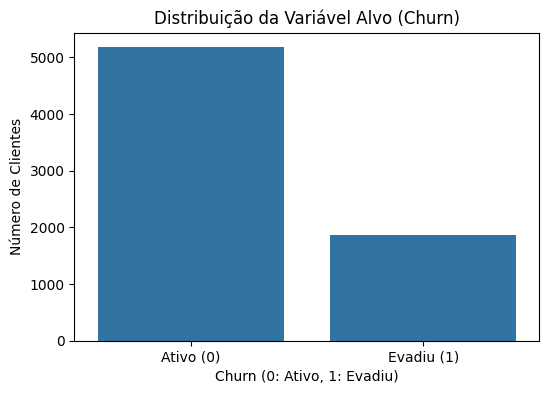

In [8]:
# Calcular contagem e propor√ß√£o em uma √∫nica linha
churn_stats = df['Churn'].value_counts(normalize=False).to_frame('Contagem')
churn_stats['Propor√ß√£o (%)'] = df['Churn'].value_counts(normalize=True) * 100

print(churn_stats)

# Visualizar a distribui√ß√£o das classes
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribui√ß√£o da Vari√°vel Alvo (Churn)')
plt.xlabel('Churn (0: Ativo, 1: Evadiu)')
plt.ylabel('N√∫mero de Clientes')
plt.xticks([0, 1], ['Ativo (0)', 'Evadiu (1)'])
plt.show()

H√° um desequil√≠brio significativo entre as classes "Ativo" e "Evadiu". A classe majorit√°ria (clientes ativos) representa aproximadamente 73.5% do dataset, enquanto a classe minorit√°ria (clientes que evadiram) representa apenas cerca de 26.5%.

**Impacto na modelagem preditiva:**

Este desequil√≠brio pode impactar o desempenho dos modelos preditivos. Modelos treinados em datasets desbalanceados tendem a ser enviesados para a classe majorit√°ria, o que significa que eles podem ter uma alta acur√°cia geral (por acertarem a maioria dos casos da classe majorit√°ria), mas podem ter um desempenho ruim na identifica√ß√£o da classe minorit√°ria (os clientes que evadiram), que √© a classe de maior interesse para este problema.

# Aplica√ß√£o de SMOTE para balanceamento

In [9]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separar features e target
X = df_encoded.drop(columns='remainder__Churn')
y = df_encoded['remainder__Churn']

# Dividir em treino e teste com estratifica√ß√£o
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Original: X={X.shape}, y={y.shape}")
print(f"Treino: X={X_train.shape}, y={y_train.shape}")
print(f"Teste:  X={X_test.shape}, y={y_test.shape}")

# Aplicar SMOTE no treino
X_train_res, y_train_res = SMOTE(random_state=42).fit_resample(X_train, y_train)

# Mostrar distribui√ß√£o ap√≥s balanceamento
print("\nDistribui√ß√£o no treino ap√≥s SMOTE:")
print(y_train_res.value_counts())


Original: X=(7043, 42), y=(7043,)
Treino: X=(4930, 42), y=(4930,)
Teste:  X=(2113, 42), y=(2113,)

Distribui√ß√£o no treino ap√≥s SMOTE:
remainder__Churn
0.0    3622
1.0    3622
Name: count, dtype: int64


Primeiro, separamos as vari√°veis independentes (X) da vari√°vel alvo (y), que representa o Churn. Em seguida, realizamos a divis√£o dos dados em treino e teste, utilizando a t√©cnica de estratifica√ß√£o (stratify=y) para manter a propor√ß√£o original das classes em ambos os conjuntos.

No passo seguinte, aplicamos o SMOTE (Synthetic Minority Over-sampling Technique) apenas sobre o conjunto de treino. Essa t√©cnica gera exemplos sint√©ticos da classe minorit√°ria, em vez de apenas replic√°-los, permitindo que o modelo aprenda de forma mais equilibrada e reduzindo o risco de overfitting.

Ap√≥s a aplica√ß√£o do SMOTE, verificamos a nova distribui√ß√£o de classes, que passa a ser balanceada. Isso garante que o modelo n√£o seja enviesado em favor da classe majorit√°ria e que possa identificar de forma mais eficiente os clientes com maior propens√£o a evas√£o.

### Avaliando os resultados:

No dataset original, existiam 7043 clientes e 42 vari√°veis (features).

A divis√£o estratificada garantiu que o treino ficasse com 4930 clientes e o teste com 2113, mantendo a propor√ß√£o de churn original.

Ap√≥s o SMOTE, o conjunto de treino ficou balanceado:

* 3622 clientes ativos (classe 0)

* 3622 clientes evadidos (classe 1)

Ou seja, agora o modelo vai aprender com a mesma quantidade de exemplos das duas classes, reduzindo o vi√©s em favor da classe majorit√°ria.

### Visualizando o antes e depois SMOTE:

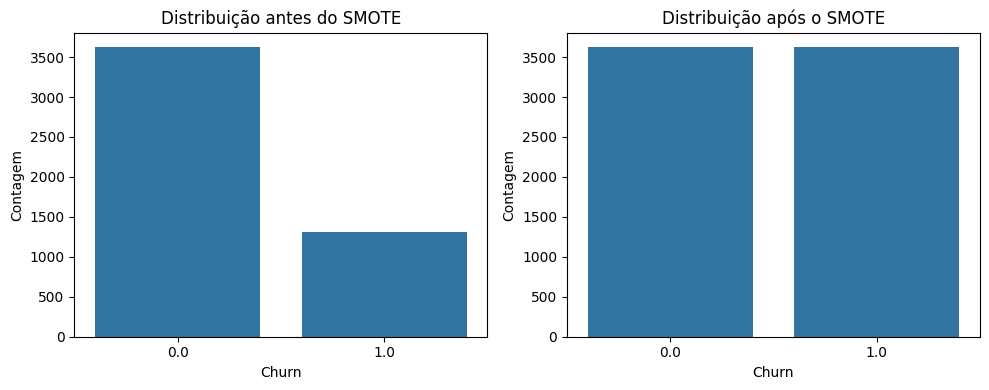

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Antes do SMOTE
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title("Distribui√ß√£o antes do SMOTE")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Contagem")

# Depois do SMOTE
sns.countplot(x=y_train_res, ax=axes[1])
axes[1].set_title("Distribui√ß√£o ap√≥s o SMOTE")
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Contagem")

plt.tight_layout()
plt.show()


# Padroniza√ß√£o dos Dados Num√©ricos

**Por que normalizar/padronizar?**

Algoritmos baseados em dist√¢ncia (como KNN, SVM) ou gradiente (como Regress√£o Log√≠stica, Redes Neurais) calculam dist√¢ncias entre pontos ou dependem da magnitude dos valores das features. Se as features tiverem escalas muito diferentes (por exemplo, uma feature com valores entre 0-1 e outra com valores entre 1000-100000), as features com maior magnitude podem dominar o c√°lculo da dist√¢ncia ou o processo de otimiza√ß√£o do modelo, levando a resultados sub√≥timos.

A normaliza√ß√£o (escalar valores para um intervalo espec√≠fico, geralmente entre 0 e 1) ou a padroniza√ß√£o (transformar os dados para ter m√©dia 0 e desvio padr√£o 1) garante que todas as features contribuam igualmente para o modelo.

Como o objetivo √© construir um pipeline robusto e provavelmente exploraremos diferentes tipos de modelos (incluindo aqueles sens√≠veis √† escala), √© uma boa pr√°tica aplicar a padroniza√ß√£o ou normaliza√ß√£o nos dados num√©ricos ap√≥s o One-Hot Encoding e o balanceamento.

In [11]:
from sklearn.preprocessing import StandardScaler

# Identificar as colunas num√©ricas j√° no dataset transformado
numeric_cols_encoded = [col for col in X_train_res.columns if col.startswith('remainder__')]
print(f"Colunas num√©ricas para padroniza√ß√£o: {numeric_cols_encoded}")

# Criar scaler
scaler = StandardScaler()

# Fit no treino balanceado e transformar
X_train_res.loc[:, numeric_cols_encoded] = scaler.fit_transform(X_train_res[numeric_cols_encoded])

# Transformar o conjunto de teste
X_test.loc[:, numeric_cols_encoded] = scaler.transform(X_test[numeric_cols_encoded])

# Verifica√ß√£o
print("\nX_train_res (ap√≥s padroniza√ß√£o):")
display(X_train_res.head())
print("\nX_test (ap√≥s padroniza√ß√£o):")
display(X_test.head())


Colunas num√©ricas para padroniza√ß√£o: ['remainder__maior_65_anos', 'remainder__possui_parceiro', 'remainder__dependentes', 'remainder__tempo_contrato_meses', 'remainder__servico_telefonico', 'remainder__fatura_online', 'remainder__cobranca_mensal', 'remainder__cobranca_total', 'remainder__num_servicos']

X_train_res (ap√≥s padroniza√ß√£o):


ohe__genero_cliente_Female  ohe__genero_cliente_Male  \
0                         0.0                       1.0   
1                         0.0                       1.0   
2                         0.0                       1.0   
3                         0.0                       1.0   
4                         1.0                       0.0   

   ohe__mais_de_uma_linha_telefonica_No  \
0                                   1.0   
1                                   1.0   
2                                   0.0   
3                                   0.0   
4                                   1.0   

   ohe__mais_de_uma_linha_telefonica_No phone service  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   ohe__mais_de_uma_linha_telefonica_Yes  ohe__servico_internet_DSL  \
0                                    0.0                        0.0   
1                                    0.0                        1.0   
2                                    1.0                        0.0   
3                                    1.0                        1.0   
4                                    0.0                        1.0   

   ohe__servico_internet_Fiber optic  ohe__servico_internet_No  \
0                                1.0                       0.0   
1                                0.0                       0.0   
2                                1.0                       0.0   
3                                0.0                       0.0   
4                                0.0                       0.0   

   ohe__servico_seguranca_online_No  \
0                               1.0   
1                               1.0   
2                               1.0   
3                               0.0   
4                               1.0   

   ohe__servico_seguranca_online_No internet service  ...  \
0                                                0.0  ...   
1                                                0.0  ...   
2                                                0.0  ...   
3                                                0.0  ...   
4                                                0.0  ...   

   ohe__forma_de_pagamento_Mailed check  remainder__maior_65_anos  \
0                                   0.0                 -0.522804   
1                                   1.0                 -0.522804   
2                                   0.0                 -0.522804   
3                                   0.0                 -0.522804   
4                                   1.0                 -0.522804   

   remainder__possui_parceiro  remainder__dependentes  \
0                   -0.919609               -0.619692   
1                   -0.919609               -0.619692   
2                    1.190908               -0.619692   
3                    1.190908               -0.619692   
4                   -0.919609               -0.619692   

   remainder__tempo_contrato_meses  remainder__servico_telefonico  \
0                        -0.565292                       0.314032   
1                        -0.941259                       0.314032   
2                         0.311963                       0.314032   
3                         1.272767                       0.314032   
4                        -1.066581                       0.314032   

   remainder__fatura_online  remainder__cobranca_mensal  \
0                 -1.426371                    0.289833   
1                  0.755166                    0.064650   
2                  0.755166                    0.246193   
3                  0.755166                    0.626736   
4                  0.755166                   -0.647559   

   remainder__cobranca_total  remainder__num_servicos  
0                  -0.421429        


X_test (ap√≥s padroniza√ß√£o):


ohe__genero_cliente_Female  ohe__genero_cliente_Male  \
4839                         1.0                       0.0   
6844                         0.0                       1.0   
648                          1.0                       0.0   
413                          1.0                       0.0   
992                          1.0                       0.0   

      ohe__mais_de_uma_linha_telefonica_No  \
4839                                   0.0   
6844                                   1.0   
648                                    1.0   
413                                    1.0   
992                                    0.0   

      ohe__mais_de_uma_linha_telefonica_No phone service  \
4839                                                0.0    
6844                                                0.0    
648                                                 0.0    
413                                                 0.0    
992                                                 1.0    

      ohe__mais_de_uma_linha_telefonica_Yes  ohe__servico_internet_DSL  \
4839                                    1.0                        0.0   
6844                                    0.0                        1.0   
648                                     0.0                        0.0   
413                                     0.0                        0.0   
992                                     0.0                        1.0   

      ohe__servico_internet_Fiber optic  ohe__servico_internet_No  \
4839                                1.0                       0.0   
6844                                0.0                       0.0   
648                                 1.0                       0.0   
413                                 0.0                       1.0   
992                                 0.0                       0.0   

      ohe__servico_seguranca_online_No  \
4839                               1.0   
6844                               0.0   
648                                1.0   
413                                0.0   
992                                1.0   

      ohe__servico_seguranca_online_No internet service  ...  \
4839                                                0.0  ...   
6844                                                0.0  ...   
648                                                 0.0  ...   
413                                                 1.0  ...   
992                                                 0.0  ...   

      ohe__forma_de_pagamento_Mailed check  remainder__maior_65_anos  \
4839                                   0.0                  2.178717   
6844                                   0.0                 -0.522804   
648                                    1.0                 -0.522804   
413                                    1.0                 -0.522804   
992                                    0.0                 -0.522804   

      remainder__possui_parceiro  remainder__dependentes  \
4839                    1.190908               -0.619692   
6844                    1.190908                1.755666   
648                    -0.919609               -0.619692   
413                     1.190908                1.755666   
992                    -0.919609               -0.619692   

      remainder__tempo_contrato_meses  remainder__servico_telefonico  \
4839                         1.690507                       0.314032   
6844                         0.562608                       0.314032   
648                         -0.857711                       0.314032   
413                          1.774056                       0.314032   
992                         -0.607066                      -3.358752   

      remainder__fatura_online  remainder__cobranca_mensal  \
4839                  0.755166                    0.748928   
6844                  0.755166                   -0.273998   
648                   0.755166                    0.424245   
413                   

# An√°lise de Correla√ß√£o e Sele√ß√£o de Vari√°veis

Por temos muitas vari√°veis, o heatmap ficaria muito ‚Äúpolu√≠do‚Äù e dif√≠cil de interpretar. Logo, optei por visualiz√°-lo de duas maneiras diferentes:
1. Filtrar apenas as top 10 vari√°veis mais correlacionadas com o target
2. Exibir um gr√°fico de barras que deixa claro quais vari√°veis t√™m maior impacto

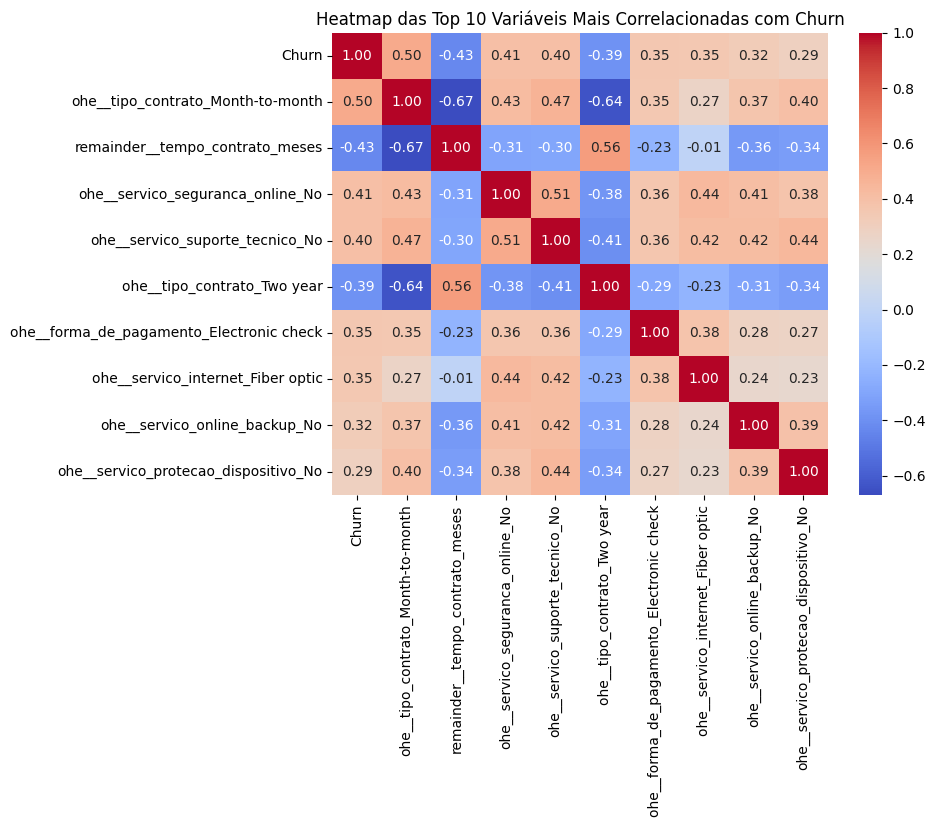

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar DataFrame tempor√°rio com features e target
df_corr = X_train_res.copy()
df_corr['Churn'] = y_train_res

# Calcular matriz de correla√ß√£o
correlation_matrix = df_corr.corr()

# Ordenar vari√°veis pela correla√ß√£o com o target
corr_with_target = correlation_matrix['Churn'].sort_values(ascending=False)

# 2Ô∏è‚É£ Heatmap: focar nas top N vari√°veis mais correlacionadas
top_n = 10
top_vars = corr_with_target.abs().sort_values(ascending=False).head(top_n).index

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix.loc[top_vars, top_vars],
    annot=True, fmt=".2f", cmap='coolwarm'
)
plt.title(f'Heatmap das Top {top_n} Vari√°veis Mais Correlacionadas com Churn')
plt.show()


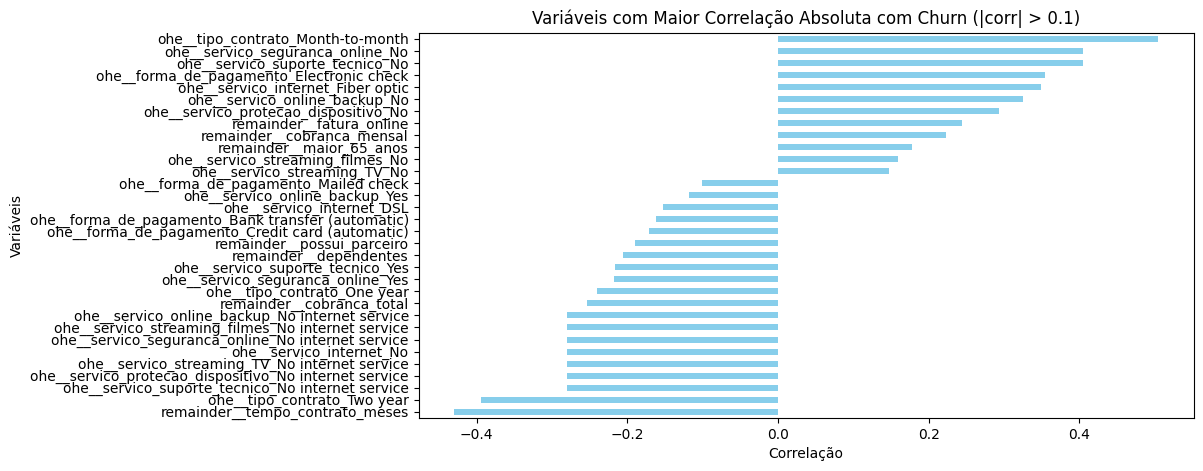

In [13]:
# 1Ô∏è‚É£ Gr√°fico de barras: mostrar apenas correla√ß√µes fortes (abs > 0.1), exceto o pr√≥prio target
strong_corr = corr_with_target.drop('Churn')
strong_corr_filtered = strong_corr[abs(strong_corr) > 0.1]

plt.figure(figsize=(10, 5))
strong_corr_filtered.sort_values().plot(kind='barh', color='skyblue')
plt.title('Vari√°veis com Maior Correla√ß√£o Absoluta com Churn (|corr| > 0.1)')
plt.xlabel('Correla√ß√£o')
plt.ylabel('Vari√°veis')
plt.show()

Observa√ß√µes gerais:

Churn vs tipo de contrato Month-to-month: Correla√ß√£o positiva forte (0.50).

* Clientes com contrato mensal t√™m maior propens√£o a evadir.

* √â uma vari√°vel forte candidata para o modelo preditivo.

Churn vs tempo de contrato (meses): Correla√ß√£o negativa moderada (-0.43).

* Quanto mais longo o tempo de contrato, menor a chance de evas√£o.

* Faz sentido l√≥gico: clientes de longo prazo tendem a permanecer.

Churn vs servi√ßos desativados

servico_seguran√ßa_online_No ‚Üí 0.41

servico_suporte_tecnico_No ‚Üí 0.40

servico_online_backup_No ‚Üí 0.32

servico_protecao_dispositivo_No ‚Üí 0.29

* Indica que clientes sem certos servi√ßos t√™m maior risco de churn.

* Essas vari√°veis s√£o relevantes para o modelo e podem ser agrupadas ou usadas individualmente.

Outras vari√°veis de contrato e pagamento

tipo_contrato_Two year ‚Üí -0.39 (contrato longo diminui churn).

forma_de_pagamento_Electronic check ‚Üí 0.35 (clientes que pagam por cheque eletr√¥nico t√™m mais chance de churn).

servico_internet_Fiber optic ‚Üí 0.35, indicando algum efeito na reten√ß√£o (talvez relacionado a perfil de cliente ou custo).

üîπ Padr√µes interessantes:

Existe uma tend√™ncia clara: contratos mais curtos e clientes que n√£o possuem servi√ßos adicionais t√™m maior probabilidade de churn.

Alguns pares de vari√°veis mostram correla√ß√£o entre si: por exemplo, tipo_contrato_Month-to-month e tipo_contrato_Two year t√™m correla√ß√£o negativa (-0.64), o que √© esperado.

Correla√ß√µes muito altas entre vari√°veis independentes podem indicar multicolinearidade, importante para alguns modelos (como regress√£o log√≠stica).

üîπ Insights para o modelo preditivo:

Priorizar vari√°veis como: tipo_contrato_Month-to-month, remainder__tempo_contrato_meses, Servi√ßos desativados (seguranca_online, suporte_tecnico, etc.), Forma de pagamento (Electronic check)

* Vari√°veis fortemente correlacionadas entre si podem ser avaliadas para reduzir dimensionalidade (PCA ou sele√ß√£o de features).

* O heatmap indica que o modelo ter√° bons sinais preditivos, pois v√°rias vari√°veis apresentam correla√ß√£o moderada a forte com o target.

# Visualiza√ß√£o: Tempo de Contrato e Churn

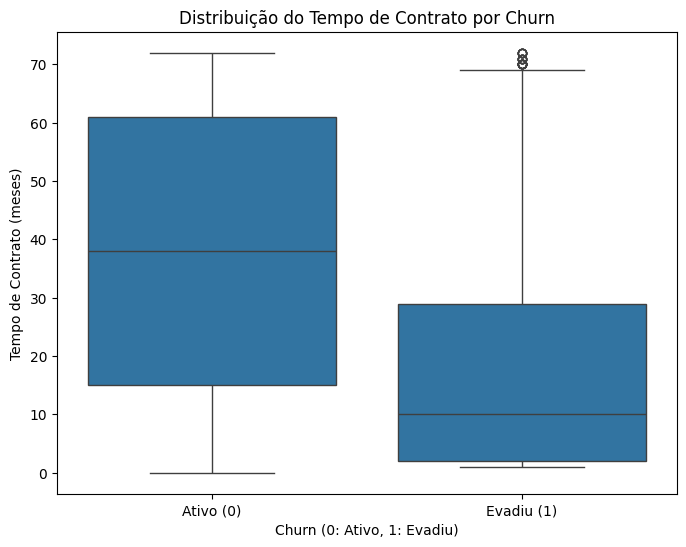

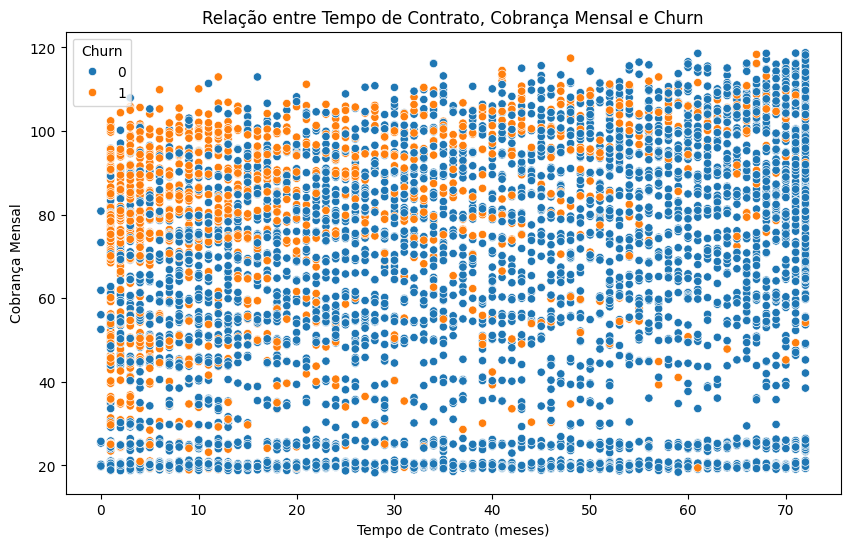

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot: Tempo de Contrato por Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tempo_contrato_meses', data=df)
plt.title('Distribui√ß√£o do Tempo de Contrato por Churn')
plt.xlabel('Churn (0: Ativo, 1: Evadiu)')
plt.ylabel('Tempo de Contrato (meses)')
plt.xticks([0, 1], ['Ativo (0)', 'Evadiu (1)'])
plt.show()

# Scatter plot: Tempo de Contrato vs. Cobran√ßa Mensal por Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo_contrato_meses', y='cobranca_mensal', hue='Churn', data=df)
plt.title('Rela√ß√£o entre Tempo de Contrato, Cobran√ßa Mensal e Churn')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Cobran√ßa Mensal')
plt.show()

# Visualiza√ß√£o: Cobran√ßa Total e Churn

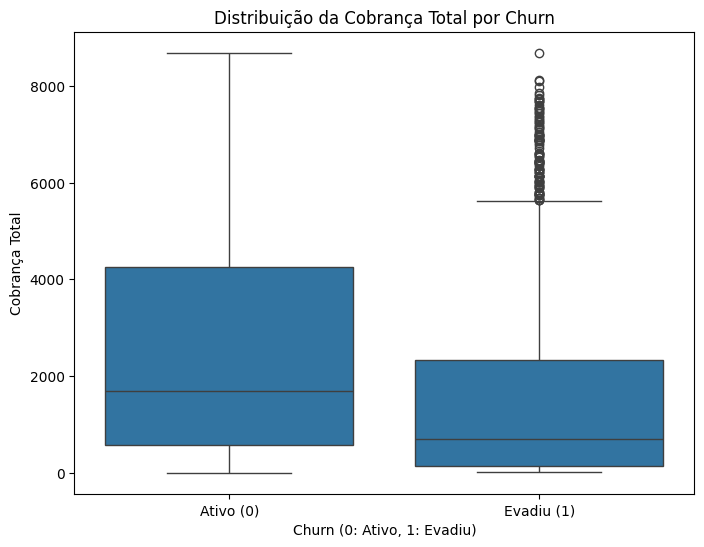

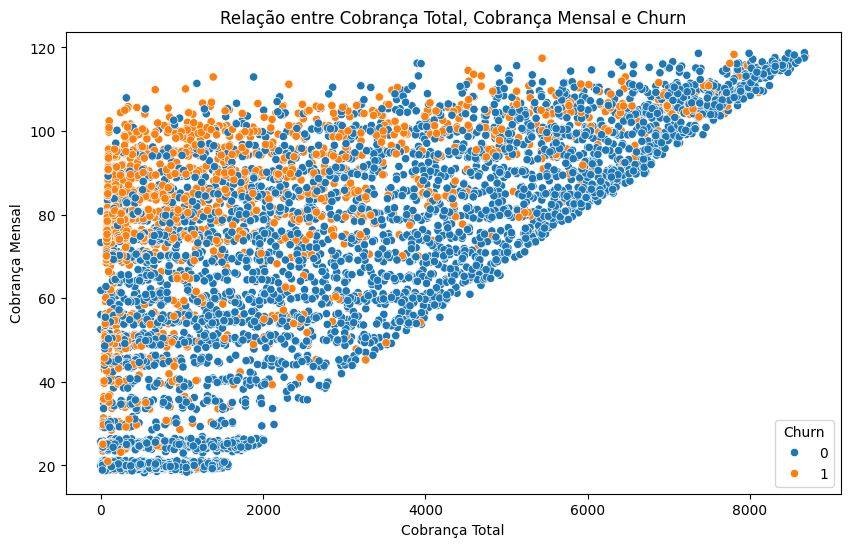

In [25]:
# Boxplot: Cobran√ßa Total por Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='cobranca_total', data=df)
plt.title('Distribui√ß√£o da Cobran√ßa Total por Churn')
plt.xlabel('Churn (0: Ativo, 1: Evadiu)')
plt.ylabel('Cobran√ßa Total')
plt.xticks([0, 1], ['Ativo (0)', 'Evadiu (1)'])
plt.show()

# Scatter plot: Cobran√ßa Total vs. Cobran√ßa Mensal por Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cobranca_total', y='cobranca_mensal', hue='Churn', data=df)
plt.title('Rela√ß√£o entre Cobran√ßa Total, Cobran√ßa Mensal e Churn')
plt.xlabel('Cobran√ßa Total')
plt.ylabel('Cobran√ßa Mensal')
plt.show()

# Divis√£o do Conjunto de Dados em Treino e Teste

In [26]:
from sklearn.model_selection import train_test_split

# Separar features (X) e target (y)
X = df_encoded.drop(columns='remainder__Churn')
y = df_encoded['remainder__Churn']

# Dividir em treino e teste (70% treino, 30% teste) com estratifica√ß√£o
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Shape do conjunto de treino (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Shape do conjunto de teste (X_test, y_test): {X_test.shape}, {y_test.shape}")

Shape do conjunto de treino (X_train, y_train): (4930, 42), (4930,)
Shape do conjunto de teste (X_test, y_test): (2113, 42), (2113,)


# Treinamento do Modelo de Regress√£o Log√≠stica

A Regress√£o Log√≠stica √© um modelo linear que estima a probabilidade de um evento ocorrer (neste caso, o Churn) com base em uma fun√ß√£o log√≠stica. √â um modelo simples, interpret√°vel e um bom ponto de partida para problemas de classifica√ß√£o. A Regress√£o Log√≠stica √© sens√≠vel √† escala das features, por isso, √© recomend√°vel aplicar a normaliza√ß√£o (como a padroniza√ß√£o que j√° fizemos) antes de trein√°-la.


 Avalia√ß√£o do Modelo de Regress√£o Log√≠stica:
Acur√°cia: 0.2664
Precis√£o: 0.2658
Recall: 1.0000
F1-Score: 0.4199
AUC-ROC: 0.4342

 Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00      1552
         1.0       0.27      1.00      0.42       561

    accuracy                           0.27      2113
   macro avg       0.63      0.50      0.21      2113
weighted avg       0.81      0.27      0.11      2113



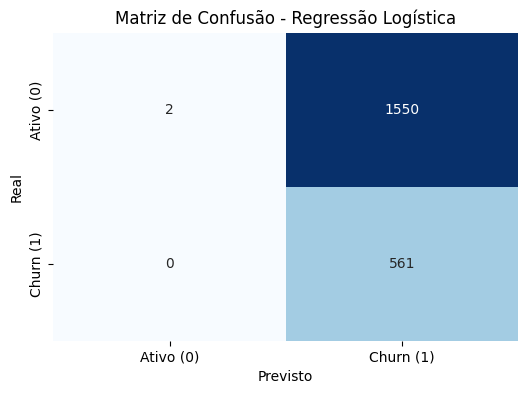

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

# Inicializar e treinar o modelo
log_reg_model = LogisticRegression(
    random_state=42,
    solver='liblinear'  # solver bom para datasets pequenos/m√©dios
)
log_reg_model.fit(X_train_res, y_train_res)

# Prever no conjunto de teste
y_pred_log_reg = log_reg_model.predict(X_test)
y_proba_log_reg = log_reg_model.predict_proba(X_test)[:, 1]

# Avaliar o modelo
metrics = {
    "Acur√°cia": accuracy_score(y_test, y_pred_log_reg),
    "Precis√£o": precision_score(y_test, y_pred_log_reg),
    "Recall": recall_score(y_test, y_pred_log_reg),
    "F1-Score": f1_score(y_test, y_pred_log_reg),
    "AUC-ROC": roc_auc_score(y_test, y_proba_log_reg)
}

print("\n Avalia√ß√£o do Modelo de Regress√£o Log√≠stica:")
for m, v in metrics.items():
    print(f"{m}: {v:.4f}")

print("\n Relat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, y_pred_log_reg))

# Matriz de confus√£o
cm = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Ativo (0)", "Churn (1)"],
            yticklabels=["Ativo (0)", "Churn (1)"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confus√£o - Regress√£o Log√≠stica")
plt.show()

# Treinamento do Modelo de √Årvore de Decis√£o

A √Årvore de Decis√£o √© um modelo n√£o linear que divide os dados em subconjuntos com base nos valores das features, criando uma estrutura em forma de √°rvore. √â f√°cil de entender e visualizar, e pode capturar intera√ß√µes complexas entre as features. √Årvores de Decis√£o n√£o s√£o sens√≠veis √† escala das features, portanto, a normaliza√ß√£o n√£o √© estritamente necess√°ria para este modelo, mas iremos utilizar tamb√©m o modelo padronizado.

Fitting 5 folds for each of 160 candidates, totalling 800 fits

 Melhor combina√ß√£o de hiperpar√¢metros encontrada:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}

 Avalia√ß√£o do Melhor Modelo de √Årvore de Decis√£o:
Acur√°cia : 0.7463
Precis√£o : 0.5229
Recall   : 0.5098
F1-Score : 0.5162
AUC-ROC  : 0.6945


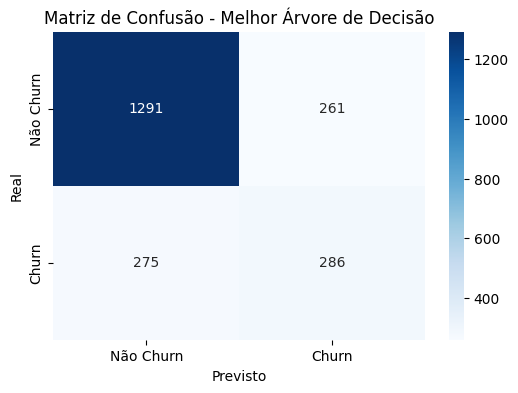

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Defini√ß√£o do modelo base
dec_tree = DecisionTreeClassifier(random_state=42)

# Defini√ß√£o do grid de hiperpar√¢metros
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 10, 20, 50],
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Configura√ß√£o do GridSearchCV
grid_search = GridSearchCV(
    estimator=dec_tree,
    param_grid=param_grid,
    scoring='f1',   # usamos F1 para balancear precis√£o e recall
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Treinamento com os dados balanceados
grid_search.fit(X_train_res, y_train_res)

# Melhor modelo
best_dec_tree = grid_search.best_estimator_
print("\n Melhor combina√ß√£o de hiperpar√¢metros encontrada:")
print(grid_search.best_params_)

# Avalia√ß√£o no conjunto de teste
y_pred_best = best_dec_tree.predict(X_test)
y_proba_best = best_dec_tree.predict_proba(X_test)[:, 1]

print("\n Avalia√ß√£o do Melhor Modelo de √Årvore de Decis√£o:")
print(f"Acur√°cia : {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precis√£o : {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_best):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred_best):.4f}")
print(f"AUC-ROC  : {roc_auc_score(y_test, y_proba_best):.4f}")

# Matriz de Confus√£o
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["N√£o Churn", "Churn"],
            yticklabels=["N√£o Churn", "Churn"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confus√£o - Melhor √Årvore de Decis√£o")
plt.show()


# Comparando os modelos


 Compara√ß√£o de Modelos:
                Modelo  Acur√°cia  Precis√£o    Recall  F1-Score   AUC-ROC
0  Regress√£o Log√≠stica  0.266446  0.265751  1.000000  0.419910  0.434168
1    √Årvore de Decis√£o  0.746332  0.522852  0.509804  0.516245  0.694544


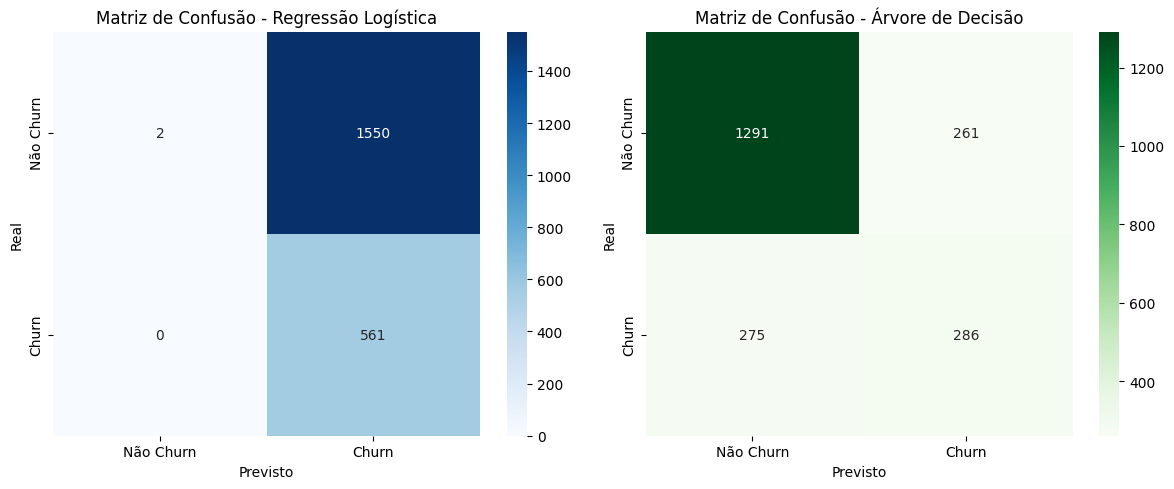

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# =============================
# 1. Avalia√ß√£o Regress√£o Log√≠stica
# =============================
y_pred_log = log_reg_model.predict(X_test)
y_proba_log = log_reg_model.predict_proba(X_test)[:, 1]

metrics_log = {
    "Modelo": "Regress√£o Log√≠stica",
    "Acur√°cia": accuracy_score(y_test, y_pred_log),
    "Precis√£o": precision_score(y_test, y_pred_log),
    "Recall": recall_score(y_test, y_pred_log),
    "F1-Score": f1_score(y_test, y_pred_log),
    "AUC-ROC": roc_auc_score(y_test, y_proba_log)
}

# =============================
# 2. Avalia√ß√£o √Årvore de Decis√£o Otimizada
# =============================
y_pred_tree = best_dec_tree.predict(X_test)
y_proba_tree = best_dec_tree.predict_proba(X_test)[:, 1]

metrics_tree = {
    "Modelo": "√Årvore de Decis√£o",
    "Acur√°cia": accuracy_score(y_test, y_pred_tree),
    "Precis√£o": precision_score(y_test, y_pred_tree),
    "Recall": recall_score(y_test, y_pred_tree),
    "F1-Score": f1_score(y_test, y_pred_tree),
    "AUC-ROC": roc_auc_score(y_test, y_proba_tree)
}

# =============================
# 3. Compara√ß√£o das M√©tricas
# =============================
import pandas as pd
df_comparacao = pd.DataFrame([metrics_log, metrics_tree])
print("\n Compara√ß√£o de Modelos:")
print(df_comparacao)

# =============================
# 4. Visualiza√ß√£o - Matrizes de Confus√£o
# =============================
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Regress√£o Log√≠stica
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues",
            xticklabels=["N√£o Churn", "Churn"],
            yticklabels=["N√£o Churn", "Churn"],
            ax=axes[0])
axes[0].set_title("Matriz de Confus√£o - Regress√£o Log√≠stica")
axes[0].set_xlabel("Previsto")
axes[0].set_ylabel("Real")

# √Årvore de Decis√£o
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Greens",
            xticklabels=["N√£o Churn", "Churn"],
            yticklabels=["N√£o Churn", "Churn"],
            ax=axes[1])
axes[1].set_title("Matriz de Confus√£o - √Årvore de Decis√£o")
axes[1].set_xlabel("Previsto")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()


# Treinamento do Modelo K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN): √â um algoritmo simples e n√£o param√©trico que classifica um ponto de dados com base na maioria das classes de seus "k" vizinhos mais pr√≥ximos no espa√ßo de features. O KNN √© sens√≠vel √† escala das features, portanto, utilizaremos os dados padronizados para este modelo.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Fun√ß√£o para avaliar modelos
def avaliar_modelo(nome, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    resultados = {
        "Modelo": nome,
        "Acur√°cia": accuracy_score(y_test, y_pred),
        "Precis√£o": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_proba)
    }

    print(f"\n--- {nome} ---")
    print("Matriz de Confus√£o:\n", confusion_matrix(y_test, y_pred))
    print("\nRelat√≥rio de Classifica√ß√£o:\n", classification_report(y_test, y_pred))

    return resultados

# Definir par√¢metros para busca
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "metric": ["minkowski", "euclidean", "manhattan"]
}

# GridSearchCV para encontrar os melhores par√¢metros
grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring="f1", # pode trocar para 'roc_auc' ou 'accuracy'
    n_jobs=-1
)

# Treinar com os dados balanceados e padronizados
grid_knn.fit(X_train_res, y_train_res)

print("Melhores par√¢metros encontrados:", grid_knn.best_params_)

# Avaliar o modelo otimizado
resultados_knn = avaliar_modelo("KNN Otimizado", grid_knn.best_estimator_, X_test, y_test)

# Converter resultados em DataFrame (para comparar com outros modelos depois)
df_resultados = pd.DataFrame([resultados_knn])
print("\nResumo de Resultados:\n", df_resultados)


Melhores par√¢metros encontrados: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

--- KNN Otimizado ---
Matriz de Confus√£o:
 [[1369  183]
 [ 369  192]]

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

         0.0       0.79      0.88      0.83      1552
         1.0       0.51      0.34      0.41       561

    accuracy                           0.74      2113
   macro avg       0.65      0.61      0.62      2113
weighted avg       0.71      0.74      0.72      2113


Resumo de Resultados:
           Modelo  Acur√°cia  Precis√£o    Recall  F1-Score   AUC-ROC
0  KNN Otimizado   0.73876     0.512  0.342246  0.410256  0.717979


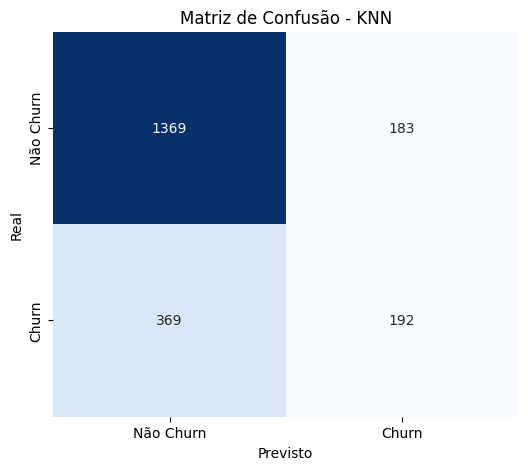

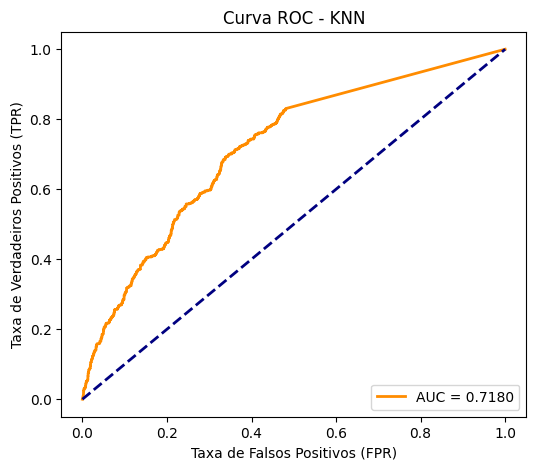

In [39]:
from sklearn.metrics import roc_curve, auc

# 1. Matriz de Confus√£o
def plot_confusion_matrix(modelo, X_test, y_test, titulo="Matriz de Confus√£o - KNN"):
    y_pred = modelo.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["N√£o Churn", "Churn"],
                yticklabels=["N√£o Churn", "Churn"])
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.title(titulo)
    plt.show()

# 2. Curva ROC
def plot_roc_curve(modelo, X_test, y_test, titulo="Curva ROC - KNN"):
    y_proba = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
    plt.xlabel("Taxa de Falsos Positivos (FPR)")
    plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
    plt.title(titulo)
    plt.legend(loc="lower right")
    plt.show()

# Exemplo de uso (usando o KNN otimizado do GridSearchCV)
plot_confusion_matrix(grid_knn.best_estimator_, X_test, y_test)
plot_roc_curve(grid_knn.best_estimator_, X_test, y_test)


# Treinamento do Modelo Random Forest

Random Forest: √â um modelo de ensemble que constr√≥i v√°rias √°rvores de decis√£o durante o treinamento e produz a classe que √© a moda das classes (classifica√ß√£o) ou a previs√£o m√©dia (regress√£o) das √°rvores individuais. √â robusto ao overfitting e geralmente tem bom desempenho. Random Forest n√£o √© sens√≠vel √† escala das features, mas para consist√™ncia na compara√ß√£o, utilizaremos tamb√©m os dados padronizados.

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Fun√ß√£o para avaliar o modelo
def avaliar_modelo(nome, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    resultados = {
        "Modelo": nome,
        "Acur√°cia": accuracy_score(y_test, y_pred),
        "Precis√£o": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_proba)
    }

    print(f"\n--- {nome} ---")
    print("Matriz de Confus√£o:\n", confusion_matrix(y_test, y_pred))
    print("\nRelat√≥rio de Classifica√ß√£o:\n", classification_report(y_test, y_pred))

    return resultados

# 2. Grid de par√¢metros para otimiza√ß√£o
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"]
}

# 3. GridSearchCV para Random Forest
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

# 4. Treinar o modelo otimizado
grid_rf.fit(X_train_res, y_train_res)
print("Melhores par√¢metros encontrados:", grid_rf.best_params_)

# 5. Avaliar o modelo otimizado
resultados_rf = avaliar_modelo("Random Forest Otimizado", grid_rf.best_estimator_, X_test, y_test)

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
424 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py"

Melhores par√¢metros encontrados: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

--- Random Forest Otimizado ---
Matriz de Confus√£o:
 [[1249  303]
 [ 180  381]]

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

         0.0       0.87      0.80      0.84      1552
         1.0       0.56      0.68      0.61       561

    accuracy                           0.77      2113
   macro avg       0.72      0.74      0.73      2113
weighted avg       0.79      0.77      0.78      2113



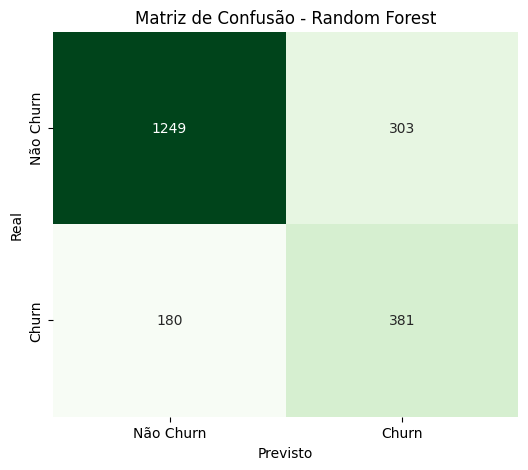

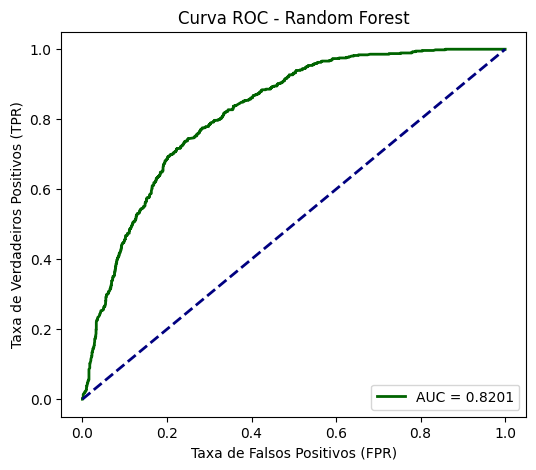

In [45]:
# 6. Visualiza√ß√£o - Matriz de Confus√£o
def plot_confusion_matrix(modelo, X_test, y_test, titulo="Matriz de Confus√£o - Random Forest"):
    y_pred = modelo.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False,
                xticklabels=["N√£o Churn", "Churn"],
                yticklabels=["N√£o Churn", "Churn"])
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.title(titulo)
    plt.show()

# 7. Visualiza√ß√£o - Curva ROC
def plot_roc_curve(modelo, X_test, y_test, titulo="Curva ROC - Random Forest"):
    y_proba = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color="darkgreen", lw=2, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
    plt.xlabel("Taxa de Falsos Positivos (FPR)")
    plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
    plt.title(titulo)
    plt.legend(loc="lower right")
    plt.show()

# 8. Executar visualiza√ß√µes
plot_confusion_matrix(grid_rf.best_estimator_, X_test, y_test)
plot_roc_curve(grid_rf.best_estimator_, X_test, y_test)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# M√©tricas da Regress√£o Log√≠stica (obtidas da c√©lula 321693ed)
metrics_log_reg = {
    "Modelo": "Regress√£o Log√≠stica",
    "Acur√°cia": accuracy_score(y_test, log_reg_model.predict(X_test)),
    "Precis√£o": precision_score(y_test, log_reg_model.predict(X_test)),
    "Recall": recall_score(y_test, log_reg_model.predict(X_test)),
    "F1-Score": f1_score(y_test, log_reg_model.predict(X_test)),
    "AUC-ROC": roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:, 1])
}

# M√©tricas da √Årvore de Decis√£o (obtidas da c√©lula 1830897e - usando o best_estimator_)
metrics_dec_tree = {
    "Modelo": "√Årvore de Decis√£o Otimizada",
    "Acur√°cia": accuracy_score(y_test, best_dec_tree.predict(X_test)),
    "Precis√£o": precision_score(y_test, best_dec_tree.predict(X_test)),
    "Recall": recall_score(y_test, best_dec_tree.predict(X_test)),
    "F1-Score": f1_score(y_test, best_dec_tree.predict(X_test)),
    "AUC-ROC": roc_auc_score(y_test, best_dec_tree.predict_proba(X_test)[:, 1])
}

# M√©tricas do KNN (obtidas da c√©lula 595acbd0 - usando o best_estimator_)
metrics_knn = {
    "Modelo": "KNN Otimizado",
    "Acur√°cia": accuracy_score(y_test, grid_knn.best_estimator_.predict(X_test)),
    "Precis√£o": precision_score(y_test, grid_knn.best_estimator_.predict(X_test)),
    "Recall": recall_score(y_test, grid_knn.best_estimator_.predict(X_test)),
    "F1-Score": f1_score(y_test, grid_knn.best_estimator_.predict(X_test)),
    "AUC-ROC": roc_auc_score(y_test, grid_knn.best_estimator_.predict_proba(X_test)[:, 1])
}

# M√©tricas do Random Forest (obtidas da c√©lula 3717b77d - usando o best_estimator_)
# √â necess√°rio re-executar a c√©lula 3717b77d para garantir que grid_rf.best_estimator_ est√° dispon√≠vel
metrics_rf = {
    "Modelo": "Random Forest Otimizado",
    "Acur√°cia": accuracy_score(y_test, grid_rf.best_estimator_.predict(X_test)),
    "Precis√£o": precision_score(y_test, grid_rf.best_estimator_.predict(X_test)),
    "Recall": recall_score(y_test, grid_rf.best_estimator_.predict(X_test)),
    "F1-Score": f1_score(y_test, grid_rf.best_estimator_.predict(X_test)),
    "AUC-ROC": roc_auc_score(y_test, grid_rf.best_estimator_.predict_proba(X_test)[:, 1])
}


# Criar DataFrame com todas as m√©tricas
df_comparacao_completa = pd.DataFrame([metrics_log_reg, metrics_dec_tree, metrics_knn, metrics_rf])

print("Tabela Comparativa de M√©tricas dos Modelos:")
display(df_comparacao_completa)

Tabela Comparativa de M√©tricas dos Modelos:


Modelo  Acur√°cia  Precis√£o    Recall  F1-Score  \
0          Regress√£o Log√≠stica  0.266446  0.265751  1.000000  0.419910   
1  √Årvore de Decis√£o Otimizada  0.746332  0.522852  0.509804  0.516245   
2                KNN Otimizado  0.738760  0.512000  0.342246  0.410256   
3      Random Forest Otimizado  0.771415  0.557018  0.679144  0.612048   

    AUC-ROC  
0  0.434168  
1  0.694544  
2  0.717979  
3  0.820113

# An√°lise de Import√¢ncia das Vari√°veis

In [49]:
# 1. Obter import√¢ncia das vari√°veis do Random Forest otimizado
importancias = grid_rf.best_estimator_.feature_importances_

# 2. Criar DataFrame com nomes das features e suas import√¢ncias
df_importancias = pd.DataFrame({
    "Vari√°vel": X_train_res.columns,  # nomes das features
    "Import√¢ncia": importancias
})

# 3. Ordenar pelas mais importantes
df_importancias = df_importancias.sort_values(by="Import√¢ncia", ascending=False)

# 4. Exibir tabela
print("Import√¢ncia das Vari√°veis - Random Forest:")
print(df_importancias)


Import√¢ncia das Vari√°veis - Random Forest:
                                             Vari√°vel  Import√¢ncia
26                  ohe__tipo_contrato_Month-to-month     0.124659
31           ohe__forma_de_pagamento_Electronic check     0.095825
8                    ohe__servico_seguranca_online_No     0.076724
36                    remainder__tempo_contrato_meses     0.075532
17                    ohe__servico_suporte_tecnico_No     0.057400
40                          remainder__cobranca_total     0.056505
28                        ohe__tipo_contrato_Two year     0.045063
11                      ohe__servico_online_backup_No     0.041444
38                           remainder__fatura_online     0.041377
39                         remainder__cobranca_mensal     0.031055
6                   ohe__servico_internet_Fiber optic     0.029397
10                  ohe__servico_seguranca_online_Yes     0.026713
27                        ohe__tipo_contrato_One year     0.025731
14             

Top 5 Vari√°veis mais importantes - Random Forest:
                                    Vari√°vel  Import√¢ncia
26         ohe__tipo_contrato_Month-to-month     0.124659
31  ohe__forma_de_pagamento_Electronic check     0.095825
8           ohe__servico_seguranca_online_No     0.076724
36           remainder__tempo_contrato_meses     0.075532
17           ohe__servico_suporte_tecnico_No     0.057400


/tmp/ipython-input-3468144613.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Import√¢ncia", y="Vari√°vel", data=df_top_importancias, palette="magma")


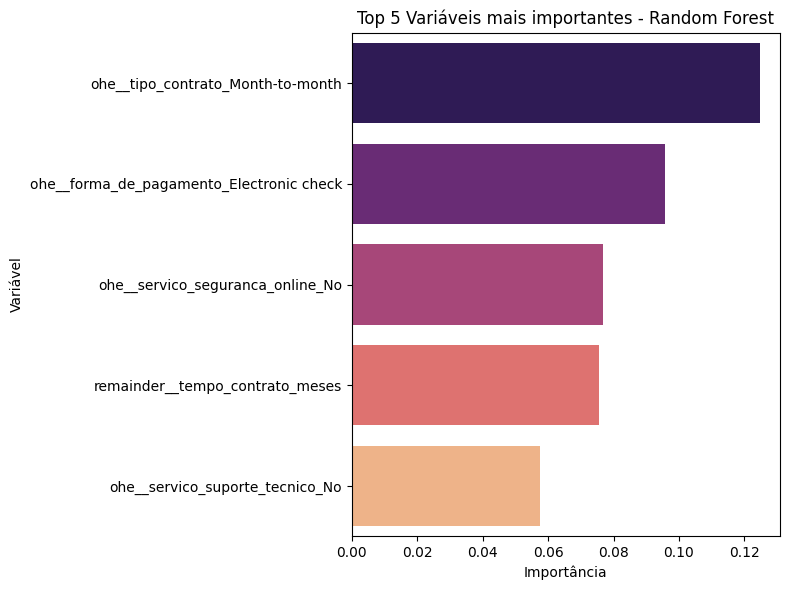

In [51]:
# Selecionar as 5 vari√°veis mais importantes
top_n = 5
df_top_importancias = df_importancias.head(top_n)

# Exibir tabela das top 5
print(f"Top {top_n} Vari√°veis mais importantes - Random Forest:")
print(df_top_importancias)

# Gr√°fico de barras das top 5 vari√°veis
plt.figure(figsize=(8,6))
sns.barplot(x="Import√¢ncia", y="Vari√°vel", data=df_top_importancias, palette="magma")
plt.title(f"Top {top_n} Vari√°veis mais importantes - Random Forest")
plt.xlabel("Import√¢ncia")
plt.ylabel("Vari√°vel")
plt.tight_layout()
plt.show()
